# Homework 20

Section 12.1

Math 404

Winter 2020

In [1]:
import umap
import warnings
import numpy as np
from matplotlib import pyplot as plt
from time import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_breast_cancer
warnings.filterwarnings('ignore')
from keras.datasets import fashion_mnist as fascist_mnist
warnings.resetwarnings() #Keras is really warnings happy when being imported.

Using TensorFlow backend.


## Exercise 12.1
For each of the following data sets run (and time) t-SNE and UMAP with their default settings to get projections of the data set down to 2 dimensions.  Plot your results as a scatterplot where the color of each point is determined by the corresponding label.  Compare your results to the PCA results you got for Exercise 9.2.

Use the default implementation of UMAP and the sklearn implementation of t-SNE.  Note: use ``pip install umap-learn``.  Do not use the package called ``umap``, which is something else entirely.
The data sets are

1. Iris - [https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)
2. Wisconsin breast cancer - [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
3. Fashion MNIST - [https://github.com/zalandoresearch/fashion-mnist#get-the-data](https://github.com/zalandoresearch/fashion-mnist#get-the-data)
    * If the computations do not complete in 10 minutes are less, you may sample randomply from the dataset to get a smaller data set with al least 4000 points and rerun the computation on the smaller set.
    * Some clusters in your FashionMNIST scatterplots will have multiple colors.  For each of these clusters, find a pair of points with different colors that lie near eachother in the cluster and plot the corresponding images.  Does it look reasonable for these images to be mapped to similar places in $\mathbb{R}^2$?

In [2]:
def time_and_plot(X, y, y_labels, return_transformers=False, verbose=False):
    
    #Ignore umap's warnings about 2 dimensions while doing this.
    warnings.filterwarnings('ignore', module='.*umap.*')
    
    u = umap.UMAP(n_components=2)
    p = PCA(n_components=2).fit(X)
    t = TSNE(n_components=2)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5));
    times = dict()
    
    for tfmr, tfmr_name, ax in zip([u, p, t], ['UMAP', 'PCA', 't-SNE'], axes.ravel()):
        
        #Fit and time.
        if verbose:
            print("Starting fit with", tfmr_name, end='')
        t = time()
        f_of_X = tfmr.fit_transform(X)
        t = time() - t
        times[tfmr_name] = t
        if verbose:
            print("    Done. Took", t, "seconds.")
        
        #plot
        for l in np.unique(y):
            lname = y_labels[l]
            mask = y == l
            ax.scatter(f_of_X[mask,0], f_of_X[mask,1], label=lname, alpha=.2);
            ax.set_title(tfmr_name)
    
    ax.legend()
    
    #Restore normal warning protocol.
    warnings.resetwarnings()
    
    if return_transformers:
        return fig, times, (u, p, t)
    else:
        return fig, times

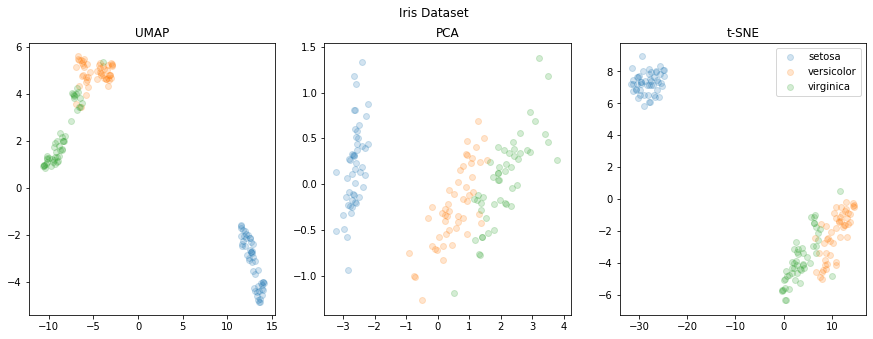

UMAP   had fit/transform time  3.255581
PCA    had fit/transform time  0.001393
t-SNE  had fit/transform time  0.711585


In [3]:
iris = load_iris()
fig, times = time_and_plot(iris.data, iris.target, iris.target_names)
fig.suptitle("Iris Dataset")
plt.show()
for method in times:
    print("{0: <6} had fit/transform time {1:9f}".format(method, times[method]))

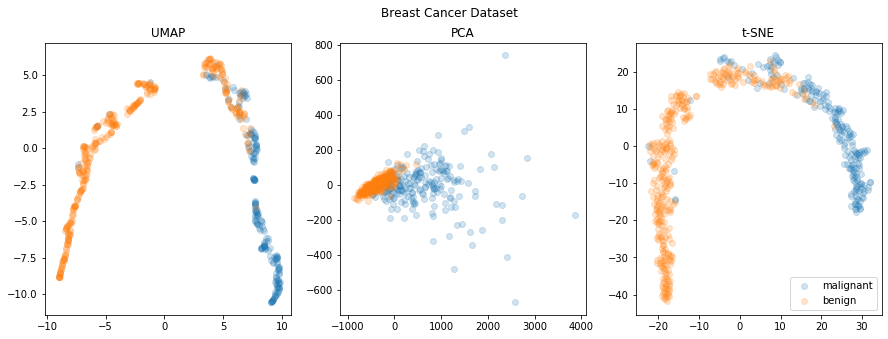

UMAP   had fit/transform time  1.278142
PCA    had fit/transform time  0.004187
t-SNE  had fit/transform time  3.269472


In [4]:
cancer = load_breast_cancer()
fig, times = time_and_plot(cancer.data, cancer.target, cancer.target_names)
fig.suptitle("Breast Cancer Dataset")
plt.show()
for method in times:
    print("{0: <6} had fit/transform time {1:9f}".format(method, times[method]))

4423680/4422102 [==============================] - 2s 0us/step
Starting fit with UMAP

/home/lschelly/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/lschelly/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nnde

    Done. Took 149.5323932170868 seconds.
Starting fit with PCA    Done. Took 1.95591402053833 seconds.
Starting fit with t-SNE    Done. Took 9641.18687415123 seconds.


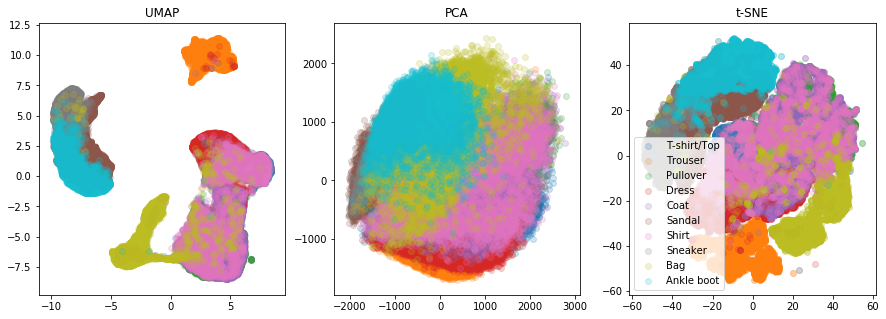

In [5]:
(train_photo, y_train), (test_photo, y_test) = fascist_mnist.load_data()
#No point in a test/train split for this.
photo = np.concatenate((train_photo, test_photo))
label = np.concatenate((y_train, y_test))
label_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
N, w, h = photo.shape
fig, times, tfmrs = time_and_plot(photo.reshape((N, -1)), label, label_names, return_transformers=True,verbose=True)
umap, pca, tSNE = tfmrs

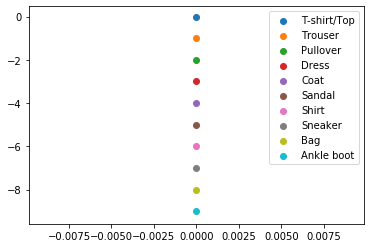

In [11]:
#Re-make the legend with the colors more solid.
for i in range(10):
    plt.scatter([0], [-i], label=label_names[i])
plt.legend()
plt.show()


In [15]:
#Need to plot pictures that were mapped close together.
#Forgot to save f_of_X, so I'll need to re-compute it here for UMAP.
f_of_X = umap.fit_transform(photo.reshape((N, -1)))

/home/lschelly/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [62]:
f_of_X_umap = f_of_X.copy()

In [96]:
#plotting umap stuff.
def scatterplot_mnist(ax, f_of_X, label):
    
    for l in np.unique(label):
        lname = label_names[l]
        mask = label == l
        ax.scatter(f_of_X[mask,0], f_of_X[mask,1], label=lname, alpha=.2)
    #ax.set_title("umap scatterplot")
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

    # Put a legend to the right of the current axis
    leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #Set opacity of markers to 1.
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    
    return

In [97]:
def find_closest(f_of_X, label, point_in_cluster, label1, label2):
    index1 = np.linalg.norm(f_of_X[label==label1, :] - point_in_cluster, axis=1).argmin()
    coordinates1 = f_of_X[label==label1][index1]
    index2 = np.linalg.norm(coordinates1 - f_of_X[label==label2,:], axis=1).argmin()
    coordinates2 = f_of_X[label==label2][index2]
    return coordinates1, coordinates2, index1, index2

In [98]:
def compare_closest_points(cluster, label_name1, label_name2, f_of_X, photo, label):

    label1 = label_names.index(label_name1)
    label2 = label_names.index(label_name2)
    coord1, coord2, ind1, ind2 = find_closest(f_of_X, label, cluster, label1, label2)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    ax1, ax2, ax3 = axes.ravel()
    
    ax1.scatter(coord1[0], coord1[1], label='chosen {}'.format(label_name1), marker='x', color='black')
    ax1.scatter(coord2[0], coord2[1], label='chosen {}'.format(label_name2), marker='x', color='red')
    scatterplot_mnist(ax1, f_of_X, label)
    ax1.scatter(coord1[0], coord1[1], marker='x', color='black')
    ax1.scatter(coord2[0], coord2[1], marker='x', color='red')
    
    ax2.imshow(photo[label==label1][ind1], cmap='gray')
    ax2.set_title("chosen {}".format(label_name1))
    
    ax3.imshow(photo[label==label2][ind2], cmap='gray')
    ax3.set_title("chosen {}".format(label_name2))
    
    plt.show()

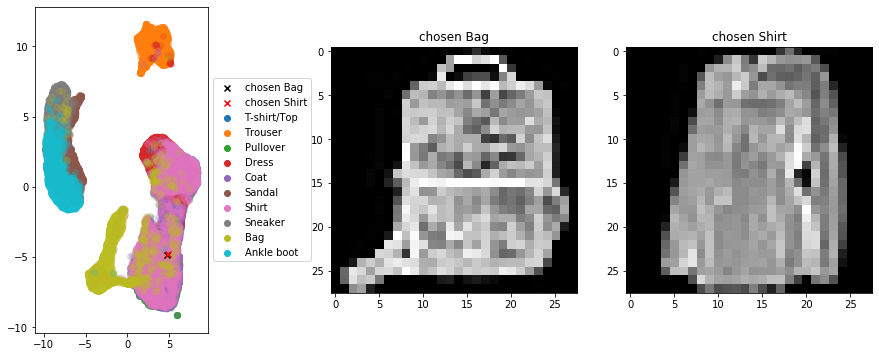

In [99]:
#We had a lot of overlap between bags and shirts in the lower right cluster.  Let's investigate that.
cluster_center = np.array([5, -5])
compare_closest_points(cluster_center, 'Bag', 'Shirt', f_of_X_umap, photo, label)

I could see where the strap of the bag at the top could be mistaken for a collar.

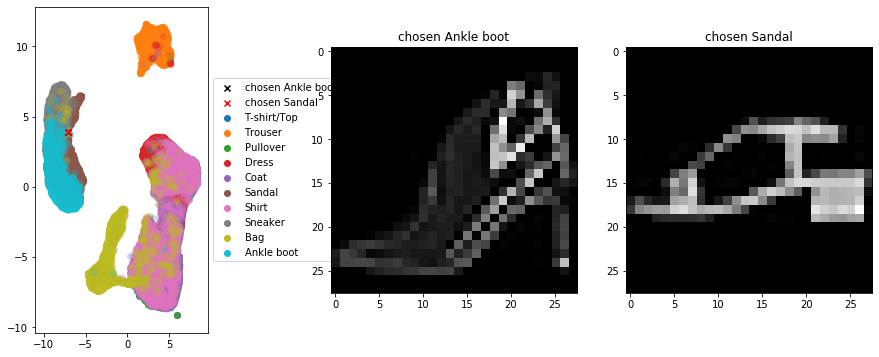

In [100]:
#We also had a log of overlap between ankle boots and sandals in the center left cluster.  Let's investigate that.
cluster_center = np.array((-7, 4))
compare_closest_points(cluster_center, 'Ankle boot', 'Sandal', f_of_X_umap, photo, label)

Interesting how they both have heels.

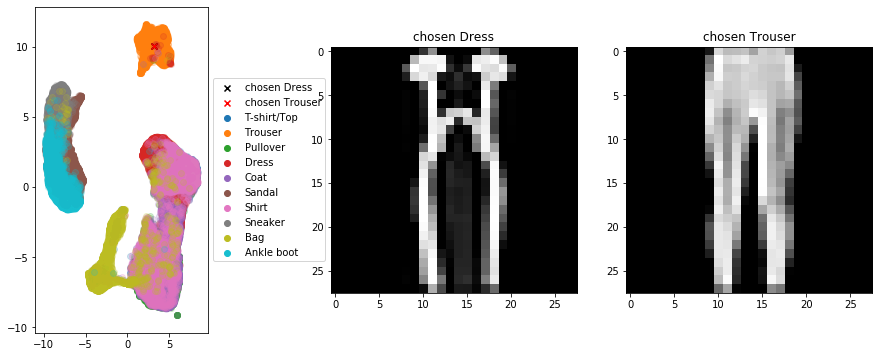

In [101]:
#Let's also investigate the overlap between dresses and trousers in the top right cluster.
cluster_center = np.array((3, 10))
compare_closest_points(cluster_center, 'Dress', 'Trouser', f_of_X_umap, photo, label)

Yeah, the lines of that dress seem to really look pant-like.

In [82]:
#If forgot to save f_of_X for t-SNE.
#t-SNE took over two hours to converge.
#So, I'll just have to redo it with a MUCH smaller sample size.
n = 4000
indices = np.random.choice(N, size = n, replace=False)
less_photos = photo[indices]
less_labels = label[indices]
tSNE = TSNE(n_components=2)
f_of_X_tSNE = tSNE.fit_transform(less_photos.reshape((n, -1)))

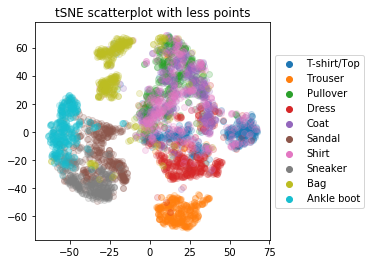

In [102]:
scatterplot_mnist(plt.gca(), f_of_X_tSNE, less_labels)
plt.title("tSNE scatterplot with less points")
plt.show()

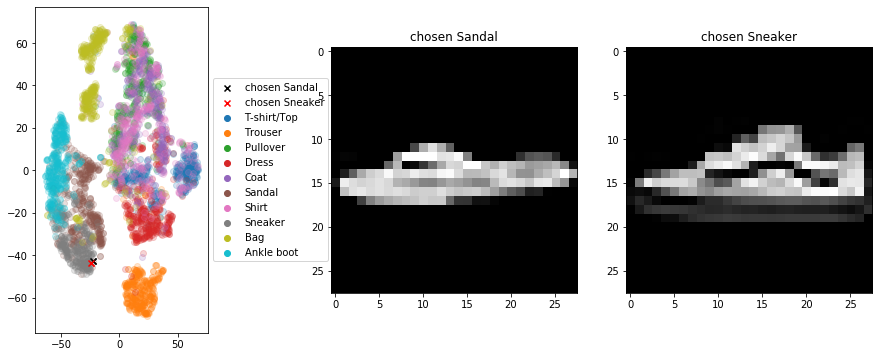

In [105]:
#Let's look at the overlap of sneakers and sandals around -25, -40
cluster_center = np.array((-25, -40))
compare_closest_points(cluster_center, 'Sandal', 'Sneaker', f_of_X_tSNE, less_photos, less_labels)

Yeah, the way that sandal is tilted kind of makes it look like the bottom is the side of a sneaker.

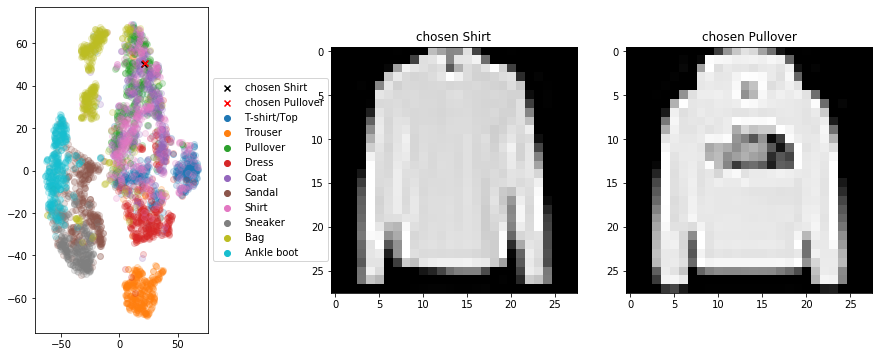

In [106]:
#Shirts and Pullovers around (20, 50)
cluster_center = np.array((20, 50))
compare_closest_points(cluster_center, 'Shirt', 'Pullover', f_of_X_tSNE, less_photos, less_labels)

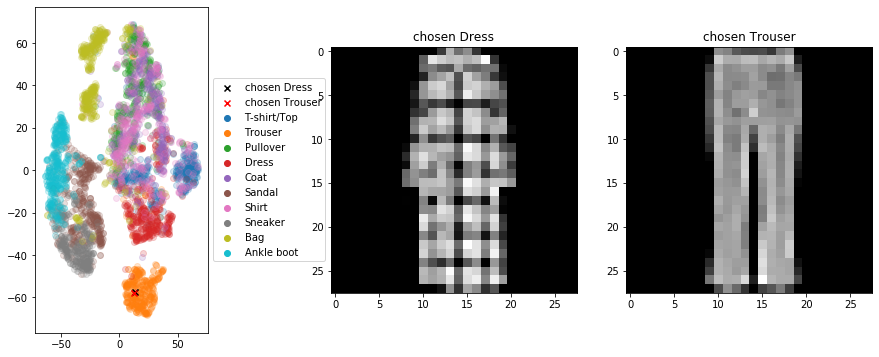

In [107]:
#Dresses and Trousers around (20, -60)
cluster_center = np.array((20, -60))
compare_closest_points(cluster_center, 'Dress', 'Trouser', f_of_X_tSNE, less_photos, less_labels)

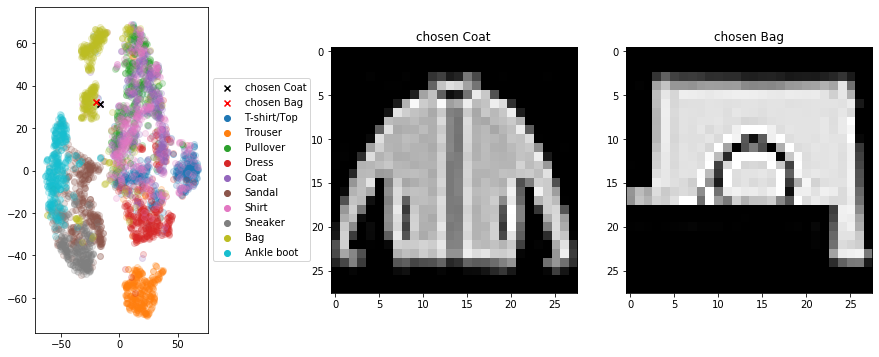

In [108]:
#Coats and bags around (-25, 30)
cluster_center = np.array((-25, 30))
compare_closest_points(cluster_center, 'Coat', 'Bag', f_of_X_tSNE, less_photos, less_labels)